# About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

*Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.*

## Problem statement

To perform descriptive analytics to create a customer profile for each Aerofit Trademil products
Constructing two way contingency tables & compute all conditional & marginal probability

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
# Observations on shape of data
df.shape
# Given data set has 180 rows and 9 columns

(180, 9)

In [ ]:
# Checking Data type for all column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Checking if there is any null/NaN value available
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
# Checking Statistical summary about the data set.
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
product_count = df['Product'].value_counts()
gender_count = df['Gender'].value_counts()
maritalStatus_count = df['MaritalStatus'].value_counts()
fitness_count = df['Fitness'].value_counts()
print("Product Value count \n",product_count)

# Product sold distribution -> Most bought product is KP281

Product Value count 
 KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


In [ ]:
print("Gender Value count \n",gender_count)
# Gender Distribution ->  More Male bought the product compare to Female

Gender Value count 
 Male      104
Female     76
Name: Gender, dtype: int64


In [ ]:
print("MaritalStatus Value count \n",maritalStatus_count)
# Marital Status Distribution -> Partnered people are more health concious and using more tredmill.

MaritalStatus Value count 
 Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


In [ ]:
print("Fitness Value count \n",fitness_count)

Fitness Value count 
 3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64


# Visual Analysis - Univariate & Bivariate

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


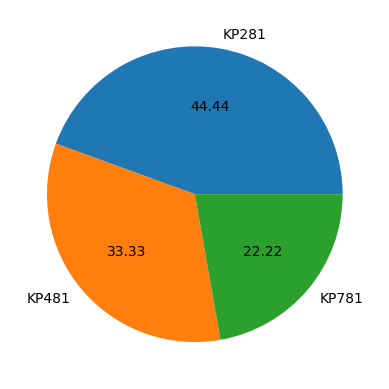

In [ ]:
# Checking Product Percentage distribution
plt.pie(df['Product'].value_counts(),labels=df['Product'].value_counts().index,autopct='%2.2f')
plt.show()

# Insights
 # 1. Most bought product is KP281 followed by KP481
 # 2. Least Bought product is KP781

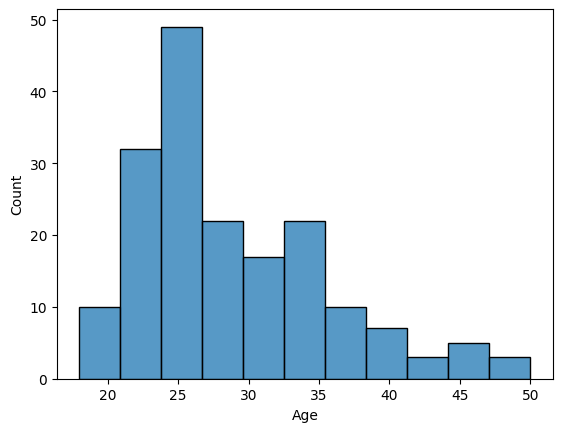

In [ ]:
sns.histplot(df['Age'])
plt.show()

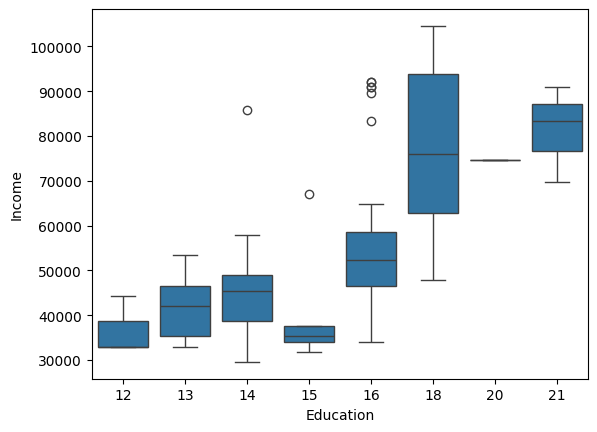

In [ ]:
sns.boxplot(data=df, x= 'Education',y='Income')
plt.show()

# Insight More educated people have more income

# Oulier: Some Less educated people earning income similary they usage more than some highly educated people.

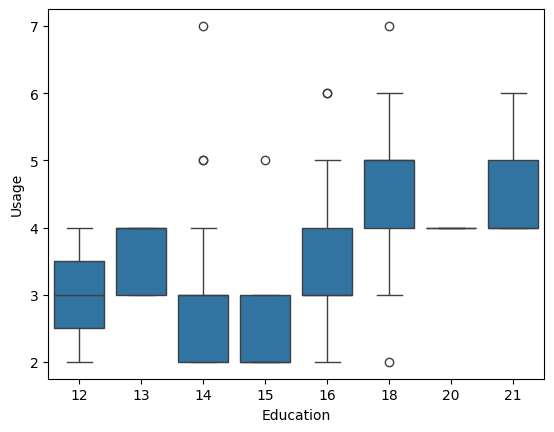

In [ ]:
sns.boxplot(data=df, x= 'Education',y='Usage')
plt.show()
# Insights
 # 1. More educating people have more usage

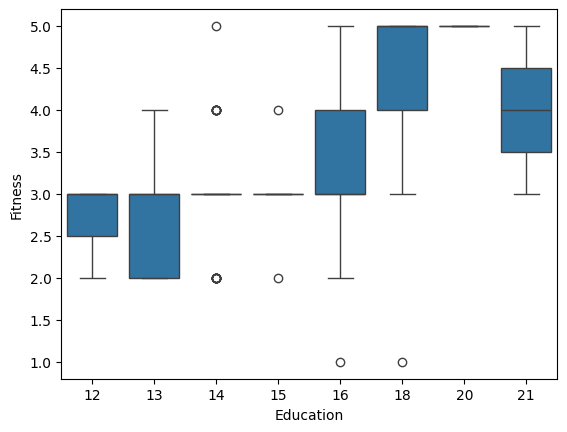

In [ ]:
sns.boxplot(data=df, x= 'Education',y='Fitness')
plt.show()

# Insight
 # 1. More educated people has more fitness level

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


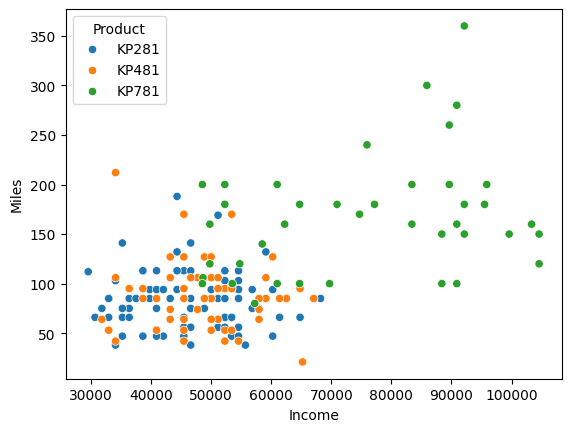

In [ ]:
sns.scatterplot(data=df, x='Income',y='Miles',hue='Product')
plt.show()

# Insight
# 1. More income people are running more and buying product KP781
# 2. KP781 is mostly famous in rich people.
# 3. KP281 and KP481 have moderate relation of Income and no. of miles customer ran.

# Recommendation
 # 1. Since only rich people is buying KP781, It needs to be fixed so that moderate range income people can also buy to increase production of KP781.
 # 2. More Advertisement require to sell KP781 product.

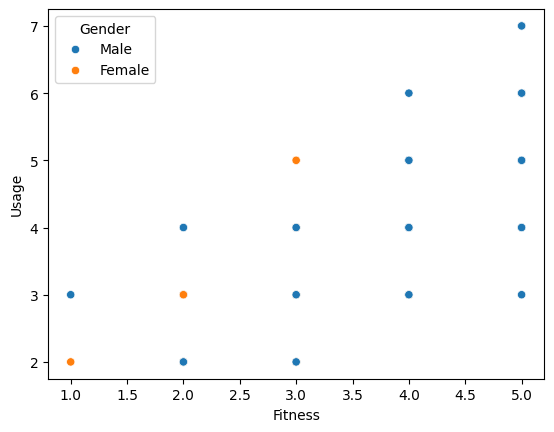

In [ ]:
sns.scatterplot(data=df, x='Fitness',y='Usage',hue='Gender')
plt.show()

# Insight
  # 1. Female is using tredmill very less hence their fitness level quite low.
# Recoomendation
  # 1.More Female advertisement and awareness content require to promote product selling among females.

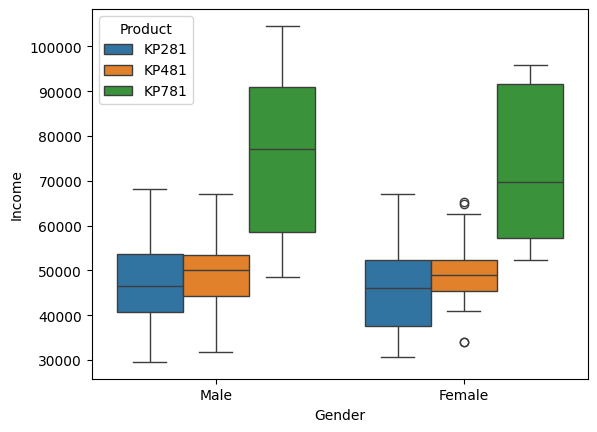

In [ ]:
sns.boxplot(data=df,x='Gender',y='Income',hue='Product')
plt.show()

In [ ]:
# Insight
# 1. KP781 most famous among both gender group
# 2. Less earn people buying mostly KP281 and KP481.



In [ ]:
pd.crosstab(index=df['Gender'], columns=df['Product'],margins=True,normalize='columns')*100

# Insight
  # 1. Only ~17.5% Female bought KP781, if company produced 1000 KP781 175 will be buy by Female only.
  # 2. Males gonna buy more KP781


Product,KP281,KP481,KP781,All
Gender,,,,
Female,50.0,48.333333,17.5,42.222222
Male,50.0,51.666667,82.5,57.777778


In [ ]:
pd.crosstab(index=df['Gender'], columns=df['Product'],margins=True,normalize=True)*100
# Insight
# 1. KP281 and KP481 are equally famous in both gender group

# Recommendation
# 1. KP781 need to be promoted or require more advertisement among both group.

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
pd.crosstab(index=df['MaritalStatus'], columns=df['Product'],margins=True, normalize='columns')
# Insight
# 1. ~60% Partnered people using more products.

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.6,0.6,0.575,0.594444
Single,0.4,0.4,0.425,0.405556
